# Distance metrics to test

* Geometric
    * Paired
    * Unpaired
* Statistical 
    * Paired
        * parametric
        * non-parametric
    * Unpaired
        * parametric
        * non-parametric

**Paired**:

* (global) Mahalanobis distance
* (local) PhiK
* (global) Global correlation
* (local) Power Predictve Score
* (local) Maximal Correlation Analysis
* (global and local) Distance Correlation
* (local) Maximal Information Coefficient
* (local and global) Procrustes shape difference
* (global) Hausdorff distance
* (local) Pearson
* (local) Spearman
* (local) Kendall-$\tau$
* (local) Weighted Kendall-$\tau$
* (local) paired t-Test
* (local) Wilcoxon-rank test
* Hilbert-Schmidt Independence Criterion
* Heller–Heller–Gorfine
* (local) Cross-entropy
* (local) Kullback-Leibler
* (local) Cosine
* (local) Minkowski-p -> Manhattan, Euclidean (**not scaled**) 
* (local) monotonic alignment score

**Unpaired**:
* (local) Wasserstein distances
* (local) Cramer-Von Mises test
* (local) ANOVA
* (local) unpaired t-Test
* (local) Mann-Whitney U
* (local) Kolmogorov-Smirnov
* (local) Kruskall-Wallis
* (local) Ball Divergence
* (local) Probability of Exceedence
* ..

**Hybrid**:
* Wasserstein, Pearson
* Scaled Cosine (Wasserstein, Euclidean)

In [1]:
%load_ext autoreload
%autoreload 1
%aimport omic_helpers

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare, chi2_contingency, pearsonr
from scipy.stats import kendalltau,spearmanr, weightedtau, theilslopes, wilcoxon, ttest_rel
from scipy.spatial import distance
import dcor
import omic_helpers

/media/bramiozo/home/bramiozo/VIRTUALENVS/long/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
def generate_test_sets(**kwargs):
    
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    
    sets = []
    mcluster = datasets.make_blobs(n_samples=1000, centers=[(-10,-10), (10,10), (-10,10), (10,-10)], 
                                cluster_std=[1., 0.5, 1.5, 0.75])[0]
    mcluster = StandardScaler().fit_transform(mcluster)
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_circles(n_samples=1000, factor=.4, noise=.01)[0]
    mcluster = StandardScaler().fit_transform(mcluster)
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_s_curve(n_samples=1000, noise=.2)[0]
    mcluster = StandardScaler().fit_transform(mcluster)[:,[0,2]]    
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_moons(n_samples=1000, noise=.1)[0]
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=[1., 0.5, 1.5])[0]
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_blobs(n_samples=1000, centers=4, cluster_std=[1., 0.5, 1.5, 0.75])[0]
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    #####################
    x = np.random.lognormal(mean=0., sigma=0.25, size=1000)
    y = -0.3/x**3 + np.random.normal(loc=0., scale=0.1, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])

    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    #####################
    x = np.random.lognormal(mean=0., sigma=0.25, size=1000)
    y = 2*x**2 + np.random.normal(loc=0., scale=0.1, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])

    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    #####################
    x = np.random.normal(loc=0, scale=0.5, size=1000)
    y = 2*x**2 + np.random.uniform(low=-0.5, high=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])

    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    #####################
    x = np.random.normal(loc=0, scale=0.5, size=1000)
    y = -2*x**2 + np.random.uniform(low=-0.5, high=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])

    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    #####################
    x = np.random.normal(loc=0.1, scale=0.5, size=1000)
    y = 2*x**2 + np.random.uniform(low=-0.5, high=0.5, size=1000)
    mcluster1 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster1 = StandardScaler().fit_transform(mcluster1)[:,:]

    x = np.random.normal(loc=-0.1, scale=0.5, size=1000)
    y = -2*x**2 + np.random.uniform(low=-0.5, high=0.5, size=1000)
    mcluster2 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster2 = StandardScaler().fit_transform(mcluster2)[:,:]
    mcluster = np.vstack([mcluster1, mcluster2])
    sets.append(mcluster)
    ####################
    x = np.random.normal(loc=0.1, scale=0.4, size=1000)
    y = np.sin(4*x) + np.random.uniform(low=-0.2, high=0.2, size=1000)
    mcluster1 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster1 = StandardScaler().fit_transform(mcluster1)[:,:]

    x = np.random.normal(loc=-0.1, scale=0.4, size=1000)
    y = np.sin(4*x) + np.random.uniform(low=-0.2, high=0.2, size=1000)
    mcluster2 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster2 = StandardScaler().fit_transform(mcluster2)[:,:]
    mcluster = np.vstack([mcluster1, mcluster2])
    sets.append(mcluster)
    ####################
    x = np.random.normal(loc=0.1, scale=0.4, size=1000)
    y = -np.sin(4*x) + np.random.uniform(low=-0.3, high=0.3, size=1000)
    mcluster1 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster1 = StandardScaler().fit_transform(mcluster1)[:,:]

    x = np.random.normal(loc=-0.1, scale=0.4, size=1000)
    y = np.sin(4*x) + np.random.uniform(low=-0.3, high=0.3, size=1000)
    mcluster2 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster2 = StandardScaler().fit_transform(mcluster2)[:,:]

    mcluster = np.vstack([mcluster1, mcluster2])
    sets.append(mcluster)
    ###################
    x = np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = x*np.sin(8*x+1) + np.random.uniform(low=-0.4, high=0.4, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)    
    ###################
    x = np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = np.random.normal(loc=0.0, scale=0.5, size=1000) # np.random.uniform(low=-0.4, high=0.4, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    ###################
    transformation = [[0.95, -0.33667341], [-0.30887718, 0.95]]
    x = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    ###################
    transformation = [[0.95, 0.33667341], [0.30887718, 0.95]]
    x = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    ###################
    transformation = [[0.7071, -0.7071], [0.7071, 0.7071]]

    x = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]

    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    
    return sets, kwargs



## Local correlations

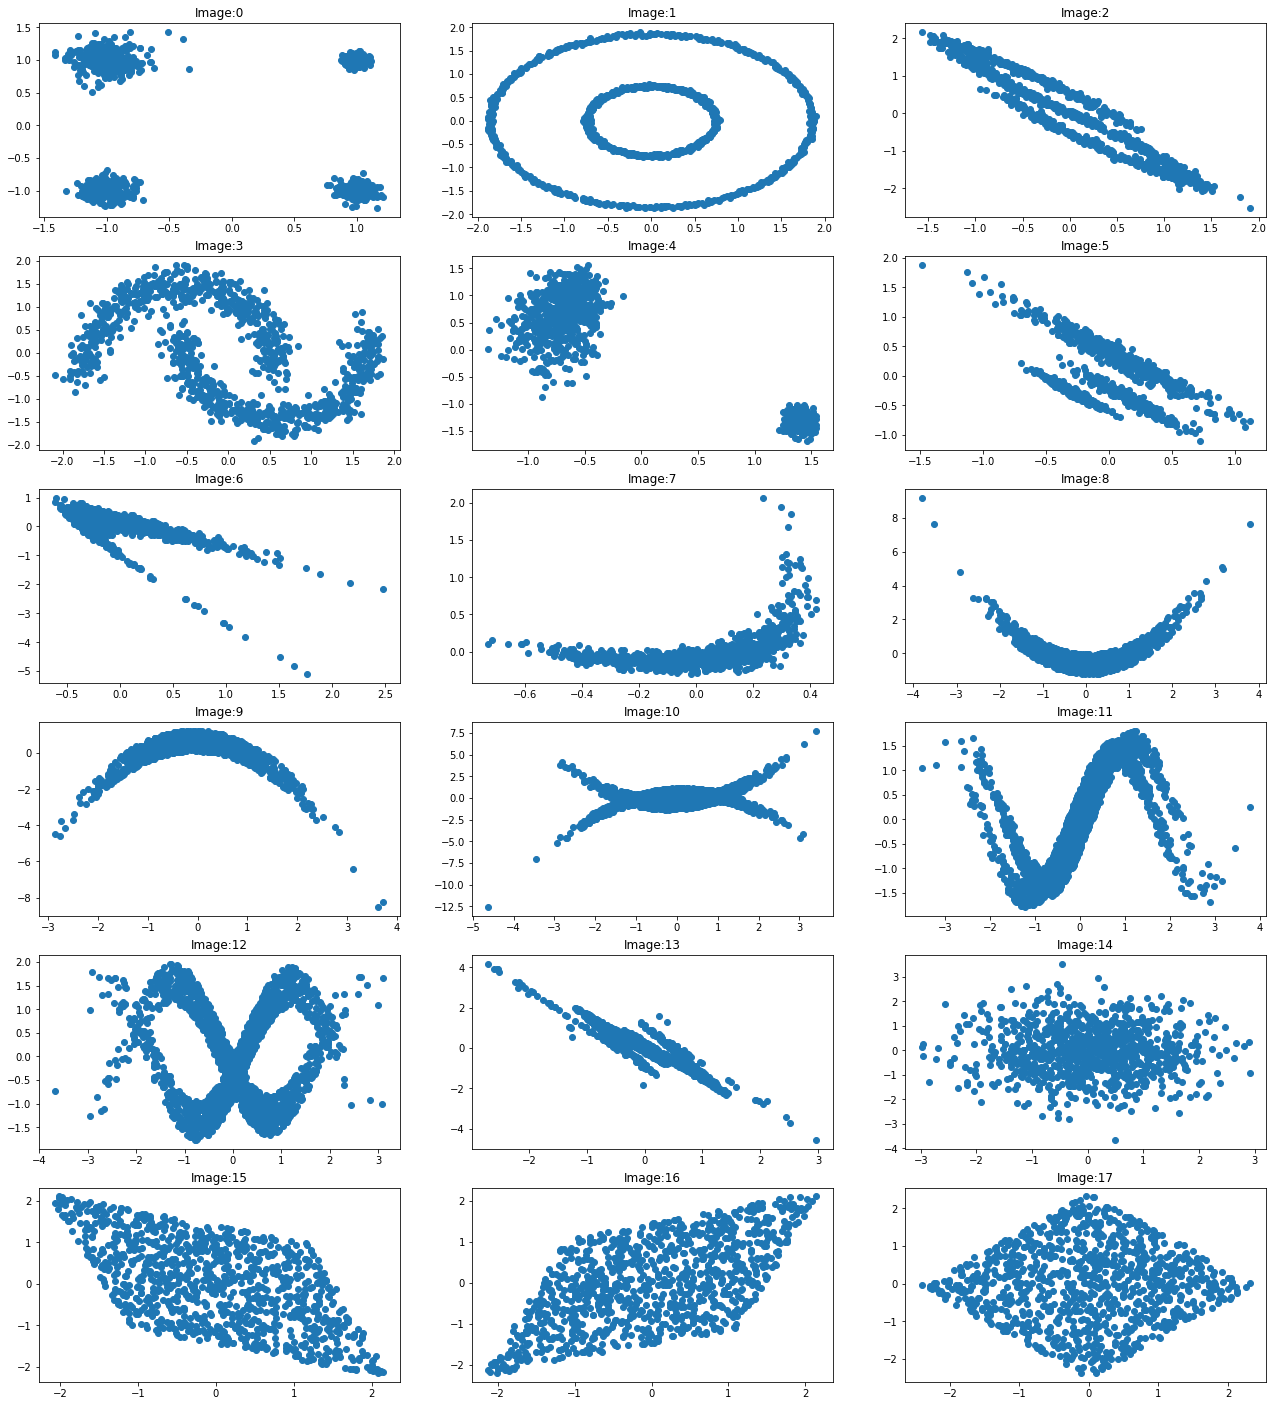

In [3]:
test_sets = generate_test_sets()[0]
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(22,25))
for k, ds in enumerate(test_sets):
    j=k%3 
    i=int(k/3)
    ax[i,j].scatter(x=ds[:,0], y=ds[:,1])
    ax[i,j].set_title(f'Image:{k}')

In [4]:
def cramer_phi(v1,v2, nbins=5, nruns=100):
    N=len(v1)

    ecov = np.cov(v1, v2)
    emp_m = np.array([np.median(v1), np.median(v2)])

    x2_list = []
    p2_list = []
    for k in range(nruns):
        bivar=np.random.multivariate_normal(emp_m, ecov, size=N)
        bivar_freq = 10000*np.histogram2d(bivar[:,0], bivar[:,1], bins=nbins, density=False)[0]+1
        emp_freq = 10000*np.histogram2d(v1, v2, bins=nbins, density=False)[0]+1

        bivar_freq = bivar_freq
        emp_freq = emp_freq

        x2 = np.nanmedian(chi2_contingency(bivar_freq, emp_freq)[0])
        p2 = np.nanmean(chi2_contingency(bivar_freq, emp_freq)[1])

        x2_list.append(np.sqrt(x2/np.sum(emp_freq)/nbins))
        p2_list.append(p2)
    return np.mean(x2_list), np.mean(p2_list)

In [5]:
n = 1
v1 = test_sets[n][:,0]
v2 = test_sets[n][:,1]

In [6]:
print(f'Pearson: {pearsonr(v1, v2)}')
print(f'{kendalltau(test_sets[n][:,0], test_sets[n][:,1])}')
print(f'{spearmanr(test_sets[n][:,0], test_sets[n][:,1])}')
print(f'Cramer-phi:{cramer_phi(test_sets[n][:,0], test_sets[n][:,1])}') # weightedtau, theilslopes
print(f'Weighted Tau:{weightedtau(test_sets[n][:,0], test_sets[n][:,1])}')
print(f'Dcor:{dcor.distance_correlation(v1,v2)}')
print(f'Dcov:{dcor.distance_covariance(v1,v2)}')
print(f'Cosine:{1-distance.cosine(v1,v2)}')
print(f'Minkowski:{1-distance.minkowski(v1,v2, p=2)}') # what is maximal Minkowski distance


Pearson: (0.0004777189718659533, 0.98796204882751)
KendalltauResult(correlation=-6.406406406406406e-05, pvalue=0.9975796080842891)
SpearmanrResult(correlation=0.00021662421662421664, pvalue=0.9945411625402765)
Cramer-phi:(0.05610901567212327, 0.0)
Weighted Tau:WeightedTauResult(correlation=-0.005343893848293197, pvalue=nan)
Dcor:0.09380968255793486
Dcov:0.06340191507413442
Cosine:0.00047771897186599244
Minkowski:-43.7106761529757


In [7]:
def rel_distance_v1(v1, v2, metric, rounds=100, **kwargs):   
    # take max,min from v1, v2 for sampling vectors
    # bootstrap vectors for average distance estimation?    
    distr = []
    
    # add rotation 
    #transformation = [[0.7071, -0.7071], [0.7071, 0.7071]]
    #mcluster = np.dot(mcluster[:,[0,1]], transformation)
    
    for k in range(rounds):
        v1r = v1[np.random.randint(0,len(v1), size=len(v1))]
        v2r = v2[np.random.randint(0,len(v2), size=len(v2))]        
        distr.append(metric(v1r,v2r))
        
    return np.max(distr)/metric(v1,v2), metric(v1,v2), distr

In [112]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVR, SVC
from sklearn.metrics import f1_score, matthews_corrcoef
def PPS(x,y, num_folds: int=10, num_iter: int=10, clf_type: str='regressor'):
    ''' Predictive power score, assumes RMSE as metric, assumes regressor, or binomial
    '''
    Kfolder = RepeatedKFold(n_splits=num_folds, n_repeats=num_iter)
    MCCs = []
    F1s = []
    CORRS = []
    if clf_type == 'regressor':
        mod = SVR()
    else:
        mod = SVC()

    if len(x.shape)==1:
        x = x.reshape((-1,1))

    if clf_type == 'regressor':
        for train,test in Kfolder.split(x,y):
            mod.fit(x[train], y[train])
            y_pred = mod.predict(x[test])
            CORRS.append(spearmanr(y[test], y_pred)[0])
            return np.nanmean(CORRS)
    else:
        for train,test in Kfolder.split(x,y):
            mod.fit(x[train], y[train])
            y_pred = mod.predict(x[test])
            MCCs.append(f1_score(y[test], y_pred))
            F1s.append(matthews_corrcoef(y[test], y_pred))



0.18800792217157825 0.09380968255793486


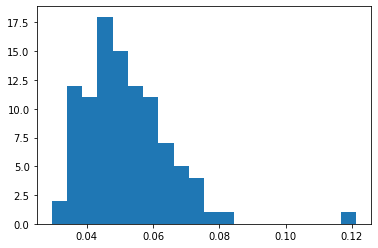

In [8]:
res, res_normal, dists = rel_distance_v1(v1,v2, dcor.distance_correlation, rounds=100)
plt.hist(dists, bins=20);
print(np.exp(-res**2), res_normal)

In [117]:
s = 4
PPS(test_sets[s][:,0], test_sets[s][:,1])

0.8048964896489649